In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Look into softmax. <br>
Oppose to sigmoid, it allows multiple dimensions <br>
Write down the formula, shape of the curve is in muli dimensions. <br>
The multiple dimensionsare actually just multiple classes

Defining the functions


In [ ]:
def softmax(h):
  return(np.exp(h.T)/np.sum(np.exp(h), axis = 1)).T

In [ ]:
def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0)

In [ ]:
def accuracy(y,y_hat):
  return np.mean(y == y_hat)

In [ ]:
def indices_to_one_hot(data, nb_classes):
  targets = np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]

In [ ]:
class MVLR():
  def __init__(self, thresh = 0.5):
    self.thresh = thresh

  def fit(self, X, y , eta = 2e-1, epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    N,D = X.shape
    K = len(np.unique(y))
    Y_values = np.unique(y,return_index = False)
    Y = indices_to_one_hot(y,K).astype(int)
    self.W = np.random.randn(D,K)
    self.B = np.random.randn(N,K)

    J = np.zeros(int(epochs))

    for epoch in range(epochs):
      P_hat = self.__forward__(X)
      J[epoch] = cross_entropy(Y,P_hat)
      
      self.W -= eta*(1/N)*X.T@(P_hat - Y)
      self.B  -= eta*(1/N)*np.sum(P_hat - Y, axis = 0)
    
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel('$\mathcal{J}$ objective function')
      plt.title('Training Curve')
      plt.show()

  def __forward__(self, X): # using for gradient descent and pridct
    return softmax(X@self.W + self.B)

  def predict(self, X):
    return np.argmax(self.__forward__(X), axis= 1 ) 

In [ ]:
data = pd.read_csv('/content/TrippleGauss.csv',header = 0)

In [ ]:
data.head()

,Unnamed: 0,0,1,2
0,0,2.850206,0.925106,0
1,1,-0.864567,3.242728,0
2,2,3.032149,3.263771,0
3,3,1.535980,-0.582925,0
4,4,2.549100,1.349371,0


In [ ]:
X = data.to_numpy()

In [ ]:
y = data['2'].to_numpy()
X = data[['0','1']].to_numpy()

In [ ]:
X.shape

(3000, 2)

In [ ]:
y.shape

(3000,)

In [ ]:
model = MVLR()

In [ ]:
model.fit(X,y)

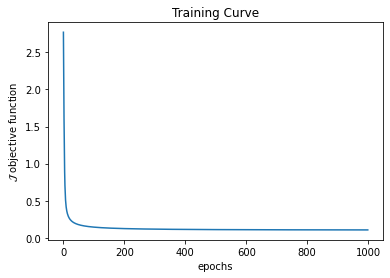

In [ ]:
model.fit(X,y, show_curve=True)

In [ ]:
y_hats = model.predict(X)

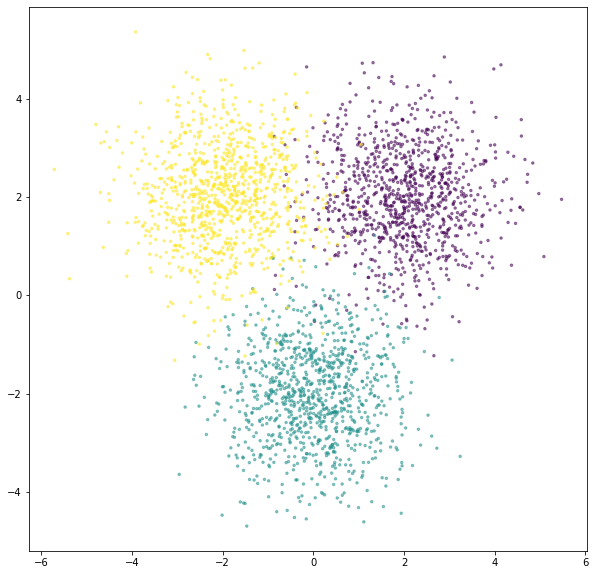

In [ ]:
plt.figure(figsize = (10,10) )
plt.scatter(X[:,0], X[:,1], c = y, alpha=.5 , s = 6)

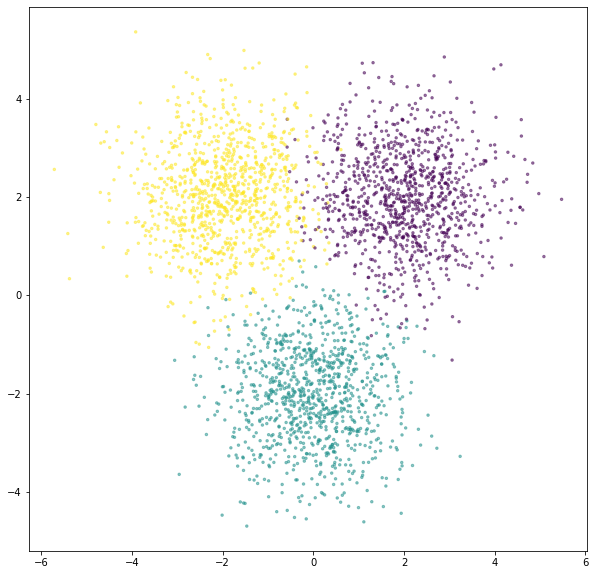

In [ ]:
plt.figure(figsize = (10,10) )
plt.scatter(X[:,0], X[:,1], c = y_hats, alpha=.5 , s = 6)

In [ ]:
accuracy(y,y_hats)

0.962